In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/nullNurs/freeCodeCamp-medical-data-visualizer/master/medical_examination.csv'


df = pd.read_csv(url)
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
df.shape

(70000, 13)

In [4]:
df['bmi'] = df.weight/df.height.div(100).pow(2)
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [5]:
def oweight(x):
    if x > 25:
        return 1
    else:
        return 0

df['overweight'] = df.bmi.map(oweight)
df.sample(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
413,587,22906,1,156,55.0,110,60,1,1,0,0,1,0,22.600263,0
31873,45520,20952,1,164,64.0,120,80,2,1,0,0,1,0,23.795360,0
36755,52524,21800,2,158,62.0,130,80,1,1,0,0,0,1,24.835763,0


In [6]:
def normal_gluc(x):
    if x == 1:
        return 0
    else:
        return 1

df['gluc'] = df['gluc'].map(normal_gluc)

def normal_chole(x):
    if x == 1:
        return 0
    else:
        return 1

df['cholesterol'] = df['cholesterol'].map(normal_chole)

df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
28433,40659,21900,1,168,105.0,130,80,1,0,1,1,0,1,37.202381,1
42235,60348,14507,2,174,76.0,120,80,0,0,0,0,1,1,25.102391,1
7463,10642,23329,2,164,74.0,100,70,0,0,0,0,0,1,27.513385,1
8611,12293,21840,2,174,86.0,140,90,1,0,0,1,1,0,28.405338,1
25686,36662,22127,2,176,105.0,120,80,0,0,0,0,0,1,33.897211,1


### Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

In [32]:
def fig1():
    cat_features = df[['cardio','gluc','cholesterol','smoke','alco','active','overweight']]
    df2 = pd.melt(cat_features, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    df2 = df2.groupby(['cardio','value','variable'], as_index=False).agg(
        total=pd.NamedAgg(column="value", aggfunc="count")
    )

    fig = sns.catplot(
        data=df2, x="variable", y="total", col="cardio", aspect=1, kind='bar', hue='value'
    ).figure
    return fig

In [10]:
# diastolic pressure is higher than systolic
df3 = df[df.ap_lo <= df.ap_hi]

# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
df4 = df3[df3['height'] >= df3['height'].quantile(0.025)]

# height is more than the 97.5th percentile
df5 = df4[df4['height'] <= df4['height'].quantile(0.975)]

# weight is less than the 2.5th percentile
df6 = df5[df5['weight'] >= df5['weight'].quantile(0.025)]

# weight is more than the 97.5th percentile
df7 = df6[df6['weight'] <= df6['weight'].quantile(0.975)]

(70000, 15)
(68766, 15)


In [34]:
def fig2():
    # creating mask
    mask = np.triu(np.ones_like(df7.corr()))
    fig = sns.heatmap(df7.corr(), annot=True, mask=mask, fmt=".1f")
    return fig

<AxesSubplot: >

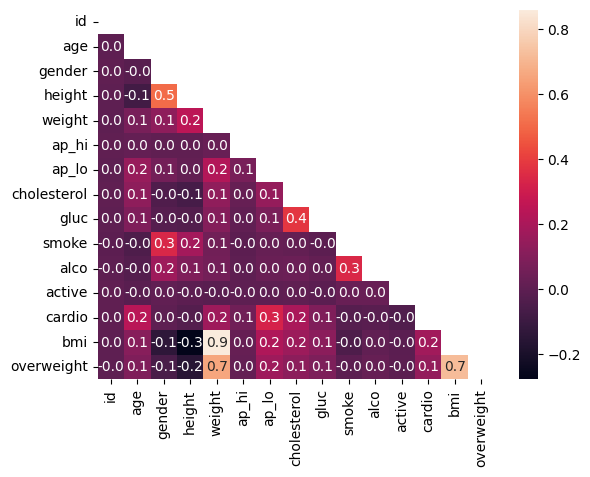

In [35]:
fig2()